In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

train_df = pd.read_csv('/content/drive/MyDrive/mitbih_train.csv',header=None)
test_df = pd.read_csv('/content/drive/MyDrive/mitbih_test.csv',header=None)

Mounted at /content/drive


In [3]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


1 model


In [5]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pywt


In [6]:
train_df[187] = train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


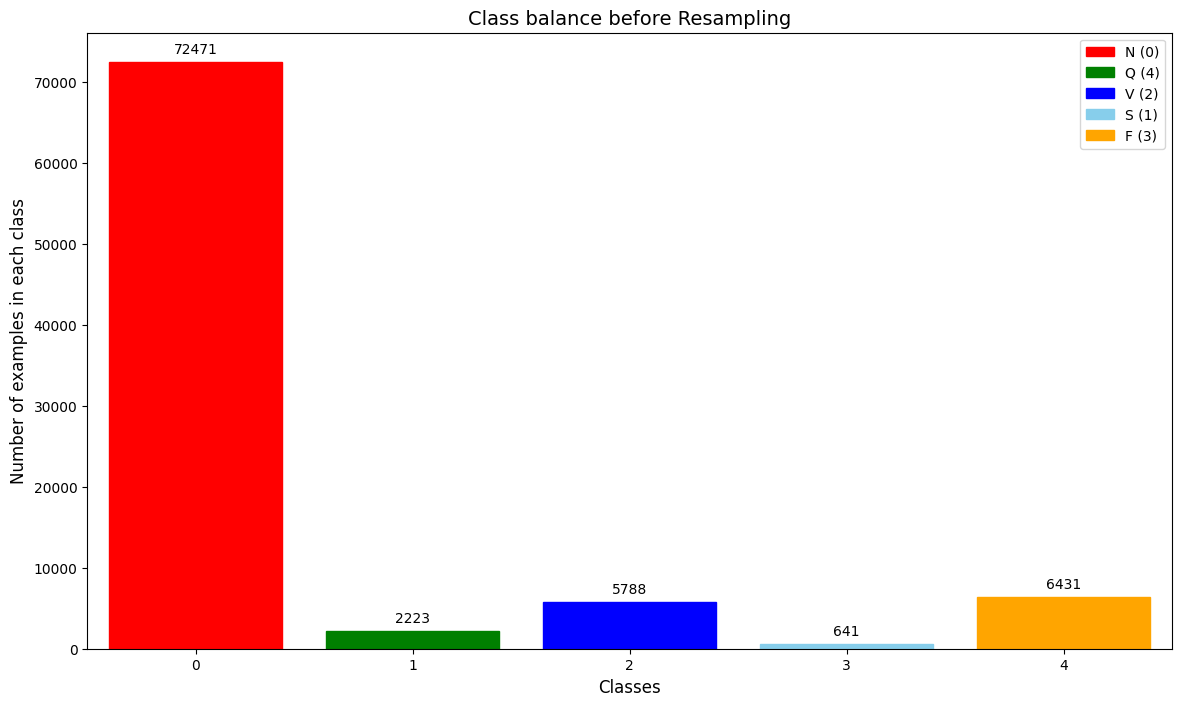

In [7]:
def plot_class_balance(train_df, title):
    train_df[187] = train_df[187].astype(int)
    class_count = train_df[187].value_counts()

    # Define the colors and labels for each class
    colors = ['red', 'green', 'blue', 'skyblue', 'orange']
    labels = ['N (0)', 'Q (4)', 'V (2)', 'S (1)', 'F (3)']

    # Create the bar plot
    fig, ax = plt.subplots(figsize=(14, 8))
    bars = sns.barplot(x=class_count.index, y=class_count.values)

    # Color each bar based on its class
    for i, bar in enumerate(bars.patches):
        bar.set_color(colors[i % len(colors)])

    # Annotate each bar with its count
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')

    # Add legend, labels, and title
    handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
    plt.legend(handles, labels)
    plt.xlabel("Classes", fontsize=12)
    plt.ylabel("Number of examples in each class", fontsize=12)
    plt.title(title, fontsize=14)

    # Show the plot
    plt.show()

plot_class_balance(train_df, "Class balance before Resampling")


In [8]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [9]:
equilibre=train_df[187].value_counts()
print(equilibre)


0    20000
1    20000
2    20000
3    20000
4    20000
Name: 187, dtype: int64


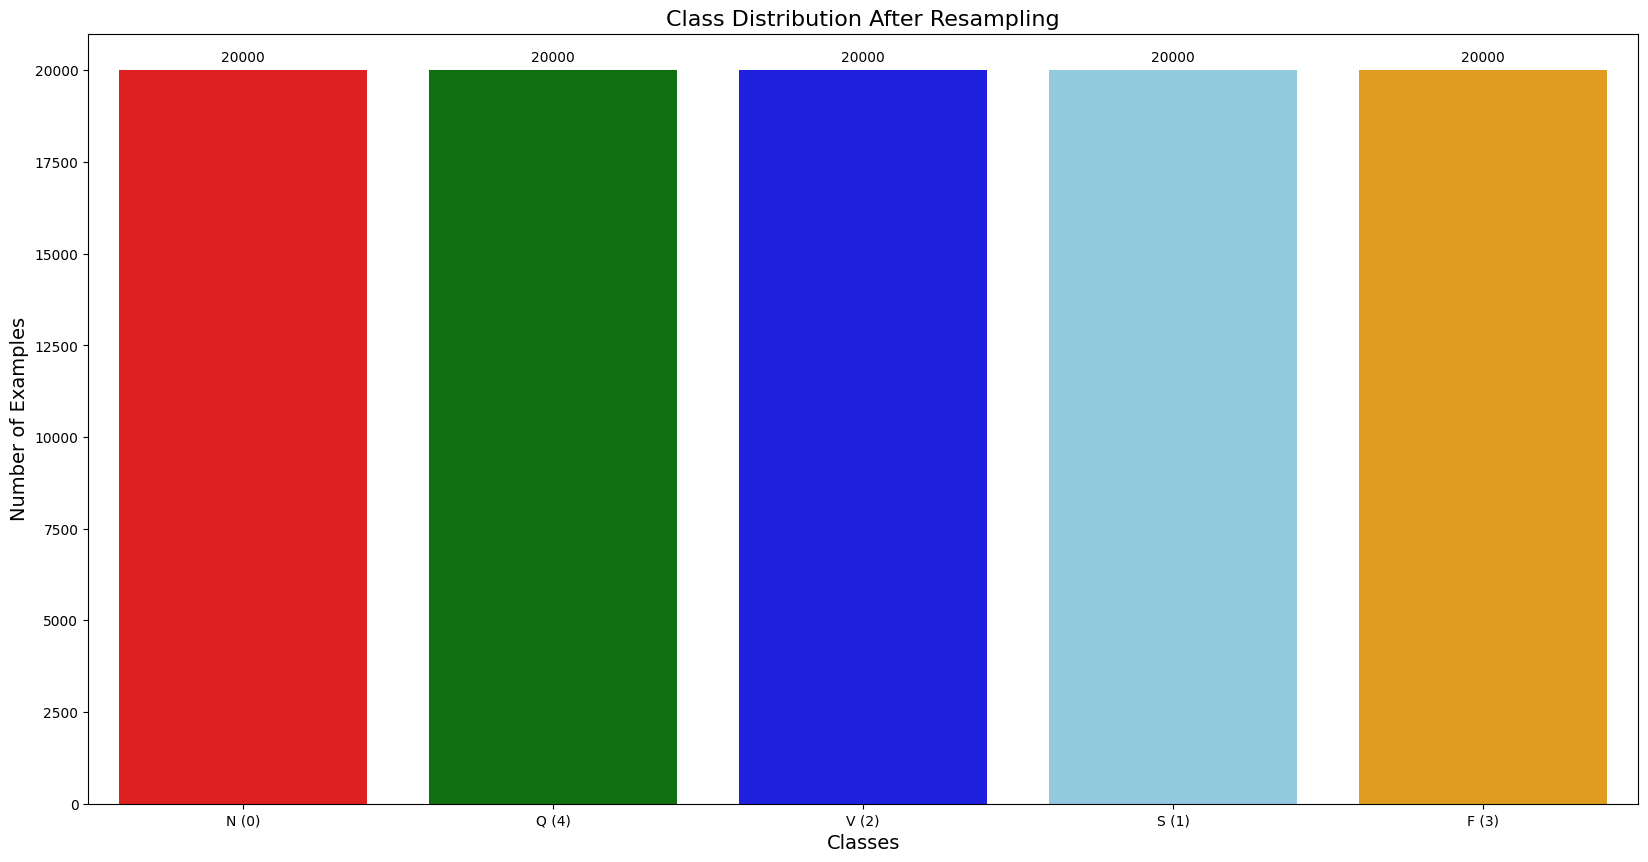

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'equilibre' contains the value counts for each class
class_counts = equilibre

# Set up the colors for different classes
colors = ['red', 'green', 'blue', 'skyblue', 'orange']
labels = ['N (0)', 'Q (4)', 'V (2)', 'S (1)', 'F (3)']

# Create the bar plot
plt.figure(figsize=(20, 10))
sns.barplot(x=labels, y=class_counts, palette=colors)

# Annotate each bar with its count
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 9),
                       textcoords='offset points')

# Set labels and title
plt.xlabel("Classes", fontsize=14)
plt.ylabel("Number of Examples", fontsize=14)
plt.title("Class Distribution After Resampling", fontsize=16)

# Show the plot
plt.show()



In [11]:
print("Statistical Data:")
print(train_df.describe())

# Calculate mean, median, and standard deviation
mean_values = train_df.mean()
median_values = train_df.median()
std_dev_values = train_df.std()

# Display mean, median, and standard deviation
print("\nMean Values:")
print(mean_values)

print("\nMedian Values:")
print(median_values)

print("\nStandard Deviation Values:")
print(std_dev_values)

Statistical Data:
                 0              1              2              3    \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.840585       0.736421       0.481091       0.313701   
std         0.280970       0.263010       0.251976       0.252200   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.827368       0.617081       0.281579       0.101449   
50%         0.972452       0.831761       0.486009       0.269704   
75%         1.000000       0.923858       0.656954       0.472222   
max         1.000000       1.000000       1.000000       1.000000   

                 4              5              6              7    \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.273039       0.265182       0.249509       0.236397   
std         0.225966       0.208125       0.203007       0.190732   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.1

In [12]:
X_train = train_df.iloc[:, 0:187].values
y_train = train_df.iloc[:, 187].values
X_test = test_df.iloc[:, 0:187].values
y_test = test_df.iloc[:, 187].values

In [13]:
import pywt
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Function to apply DWT and extract features
def extract_dwt_features(signal, wavelet="db4", level=4):
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    features = np.concatenate([coeff.flatten() for coeff in coeffs])
    return features

# Apply DWT to each signal in the dataset
X_train_dwt = np.array([extract_dwt_features(signal) for signal in X_train])
X_test_dwt = np.array([extract_dwt_features(signal) for signal in X_test])

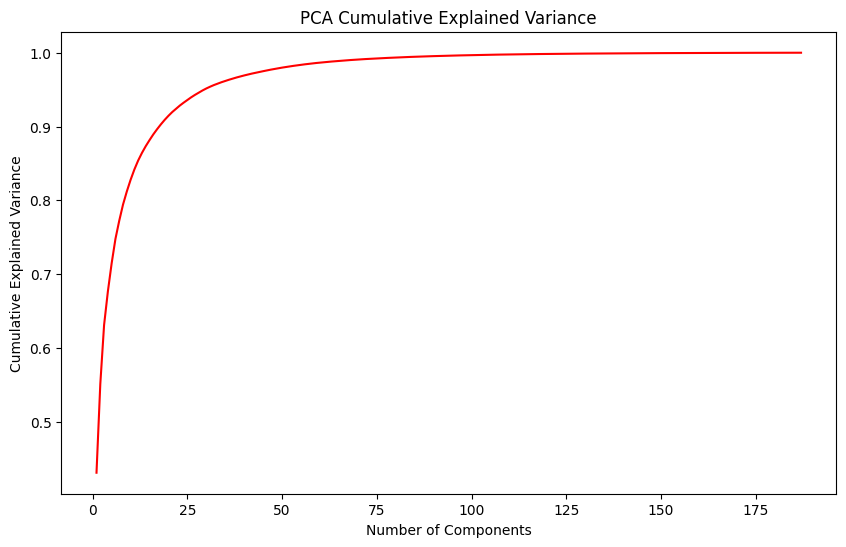

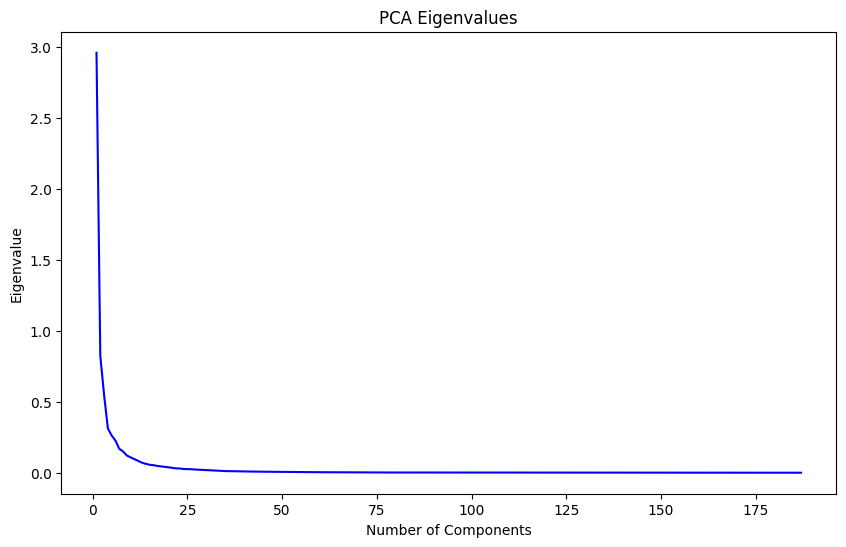

Number of components selected based on threshold variance 0.95: 29
PCA applied on training data.


In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the maximum number of components to evaluate
max_components = min(len(X_train), 187)  # or any other upper limit you deem appropriate

# Initialize dictionaries
pca_dict = {}
eigen_dict = {}

# Loop over a range of components
for n_comp in range(1, max_components + 1):
    pca = PCA(n_components=n_comp)
    pca.fit(X_train)  # Fit only on training data

    explained_variance_ratio_sum = pca.explained_variance_ratio_.sum()
    eigen_values = pca.explained_variance_[n_comp - 1]  # Get the last eigenvalue

    pca_dict[n_comp] = explained_variance_ratio_sum
    eigen_dict[n_comp] = eigen_values

# Plotting Cumulative Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(list(pca_dict.keys()), list(pca_dict.values()), 'r')
plt.title('PCA Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Plotting Eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(list(eigen_dict.keys()), list(eigen_dict.values()), 'b')
plt.title('PCA Eigenvalues')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.show()

# Select the number of components where the cumulative explained variance is below a threshold
threshold_variance = 0.95
pca_comp_eigen = max([n_comp for n_comp, var_ratio in pca_dict.items() if var_ratio < threshold_variance])

print(f'Number of components selected based on threshold variance {threshold_variance}: {pca_comp_eigen}')

# Applying PCA with selected components
pca = PCA(n_components=pca_comp_eigen)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print('PCA applied on training data.')


SVM Accuracies - PCA:
Linear kernel has maximum accuracy - 0.7132 for C value 0.01
Rbf kernel has maximum accuracy - 0.9668 for C value 1000
Poly kernel has maximum accuracy - 0.9496 for C value 1000
Sigmoid kernel has maximum accuracy - 0.5273 for C value 0.001


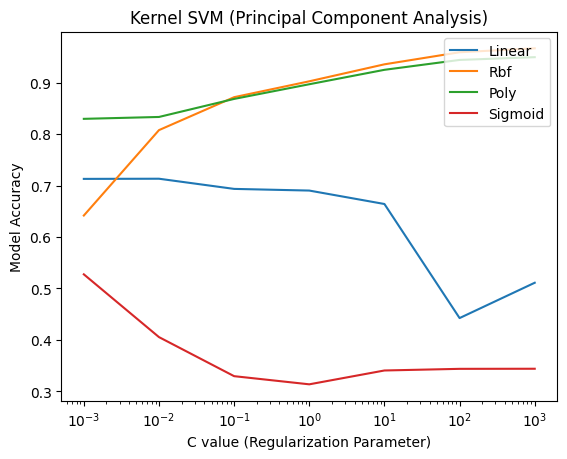

In [16]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Hyperparameter tuning for regularization parameter and kernel for SVM
c_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

pca_accuracy = {'linear': [], 'rbf': [], 'poly': [], 'sigmoid': []}

for kernel in kernels:
    for cval in c_list:
        clf = SVC(max_iter=100000, kernel=kernel, C=cval)

        clf.fit(X_train_pca, y_train)
        pca_accuracy[kernel].append(clf.score(X_test_pca, y_test))

        # Cleanup to save memory
        del clf

# Printing maximum accuracies for each kernel
print('SVM Accuracies - PCA:')
for kernel in kernels:
    max_accuracy = max(pca_accuracy[kernel])
    best_c = c_list[pca_accuracy[kernel].index(max_accuracy)]
    print(f'{kernel.capitalize()} kernel has maximum accuracy - {round(max_accuracy, 4)} for C value {best_c}')

# Plotting the Accuracy with C values
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.set_xscale('log')
ax.set_title('Kernel SVM (Principal Component Analysis)')
ax.set_xlabel('C value (Regularization Parameter)')
ax.set_ylabel('Model Accuracy')
for kernel in kernels:
    ax.plot(c_list, pca_accuracy[kernel], label=kernel.capitalize())
ax.legend(loc='upper right')
plt.show()


In [45]:
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Confusion matrix, without normalization
Normalized confusion matrix


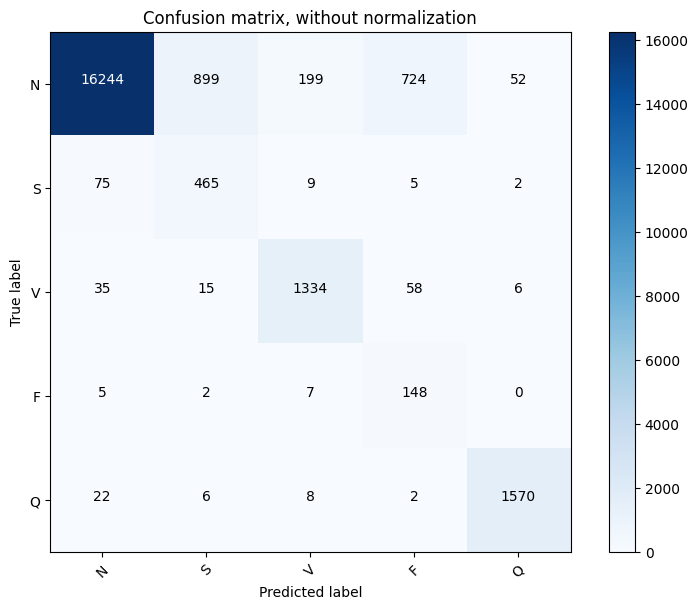

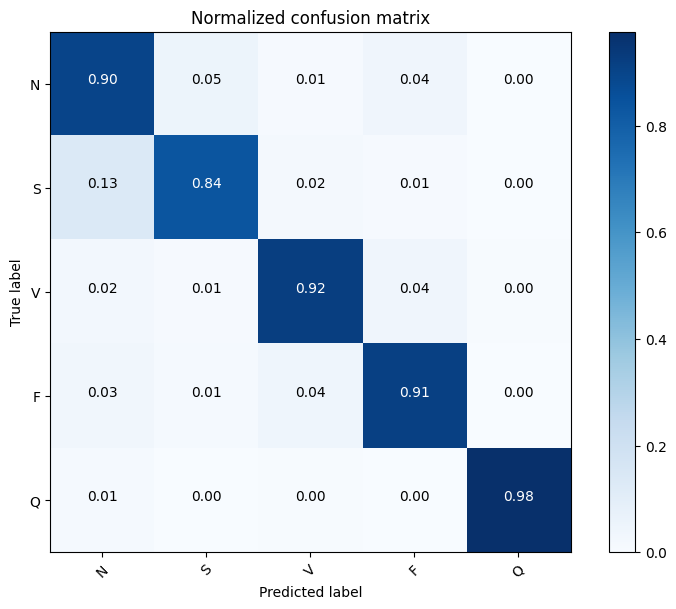

In [48]:
from sklearn.svm import SVC

clf = SVC(max_iter=100000, kernel='rbf', C=1)
clf.fit(X_train_pca, y_train)

# Assuming you have already trained an SVM model and assigned it to the variable 'clf'

# Make predictions using the model
y_pred = clf.predict(X_test_pca)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'], title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'], normalize=True, title='Normalized confusion matrix')

plt.show()